<a href="https://colab.research.google.com/github/WeCanLearnMachineLearning/Gabby_/blob/main/livelihood_random_forest_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

def clean_dataset(dataset_path):
    # Load the CSV dataset into a pandas DataFrame
    df = pd.read_csv(dataset_path)

    # Clean up the dataset by removing leading and trailing spaces
    cleaned_df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    # Impute missing values with the mean using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    cleaned_df = pd.DataFrame(imputer.fit_transform(cleaned_df), columns=cleaned_df.columns)

    return cleaned_df

# Example usage
dataset_name = "Uganda 5.csv"
cleaned_dataset = clean_dataset(dataset_name)
print(cleaned_dataset.head())

     1     2     3    4    5    6    7    8    9   10  ...   74   75   76  \
0  1.0  25.0   8.0  2.0  3.0  1.0  2.0  3.0  2.0  3.0  ...  2.0  1.0  2.0   
1  1.0  20.0   2.0  1.0  3.0  3.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  2.0   
2  1.0  28.0   2.0  2.0  4.0  1.0  2.0  1.0  0.0  1.0  ...  2.0  1.0  2.0   
3  1.0  63.0  32.0  2.0  1.0  3.0  6.0  8.0  2.0  4.0  ...  2.0  1.0  2.0   
4  1.0  30.0  20.0  2.0  3.0  1.0  8.0  2.0  3.0  5.0  ...  0.0  0.0  0.0   

    77   78   79   80   82   94  116  
0  2.0  0.0  0.0  0.0  0.0  0.0  1.0  
1  2.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  1.0  1.0  0.0  0.0  3.0  0.0  0.0  
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 35 columns]


## Importing the dataset

In [ ]:
X = cleaned_dataset.iloc[:, :-1].values
y = cleaned_dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[ 1. 38.  1. ...  0.  3.  0.]
 [ 2. 31. 25. ...  3.  3.  0.]
 [ 1. 37. 20. ...  1.  0.  0.]
 ...
 [ 2. 27. 20. ...  0.  3.  0.]
 [ 2. 28. 10. ...  0.  0.  0.]
 [ 1. 56. 40. ...  2.  1.  0.]]


In [ ]:
print(y_train)

[0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]


In [ ]:
print(X_test)

[[ 2. 32.  8. ...  0.  0.  0.]
 [ 2. 33.  0. ...  0.  0.  0.]
 [ 1. 30. 15. ...  2.  1.  0.]
 ...
 [ 1. 66. 12. ...  0.  0.  0.]
 [ 2. 60. 40. ...  0.  0.  0.]
 [ 1. 56. 23. ...  2.  0.  0.]]


In [ ]:
print(y_test)

[1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-0.65173579 -0.22143455 -1.15834413 ... -0.6912822   2.0938953
  -0.47321673]
 [ 1.32108606 -0.75891037  1.02054252 ...  1.97849733  2.0938953
  -0.47321673]
 [-0.65173579 -0.29821681  0.5666078  ...  0.19864431 -0.66511968
  -0.47321673]
 ...
 [ 1.32108606 -1.0660394   0.5666078  ... -0.6912822   2.0938953
  -0.47321673]
 [ 1.32108606 -0.98925714 -0.34126164 ... -0.6912822  -0.66511968
  -0.47321673]
 [-0.65173579  1.16064612  2.38234667 ...  1.08857082  0.25455198
  -0.47321673]]


In [ ]:
print(X_test)

[[ 1.32108606 -0.68212811 -0.52283552 ... -0.6912822  -0.66511968
  -0.47321673]
 [ 1.32108606 -0.60534585 -1.24913107 ... -0.6912822  -0.66511968
  -0.47321673]
 [-0.65173579 -0.83569263  0.11267308 ...  1.08857082  0.25455198
  -0.47321673]
 ...
 [-0.65173579  1.92846871 -0.15968775 ... -0.6912822  -0.66511968
  -0.47321673]
 [ 1.32108606  1.46777515  2.38234667 ... -0.6912822  -0.66511968
  -0.47321673]
 [-0.65173579  1.16064612  0.83896863 ...  1.08857082 -0.66511968
  -0.47321673]]


## Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting a new result

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [1. 0.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  7]
 [ 4 16]]


0.7105263157894737

Other evaluation metrics

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)

print("Random Forest Model:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"Recall: {rf_recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Model:
Accuracy: 0.6579
F1 Score: 0.7347
Recall: 0.9000

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.39      0.52        18
         1.0       0.62      0.90      0.73        20

    accuracy                           0.66        38
   macro avg       0.70      0.64      0.63        38
weighted avg       0.70      0.66      0.63        38



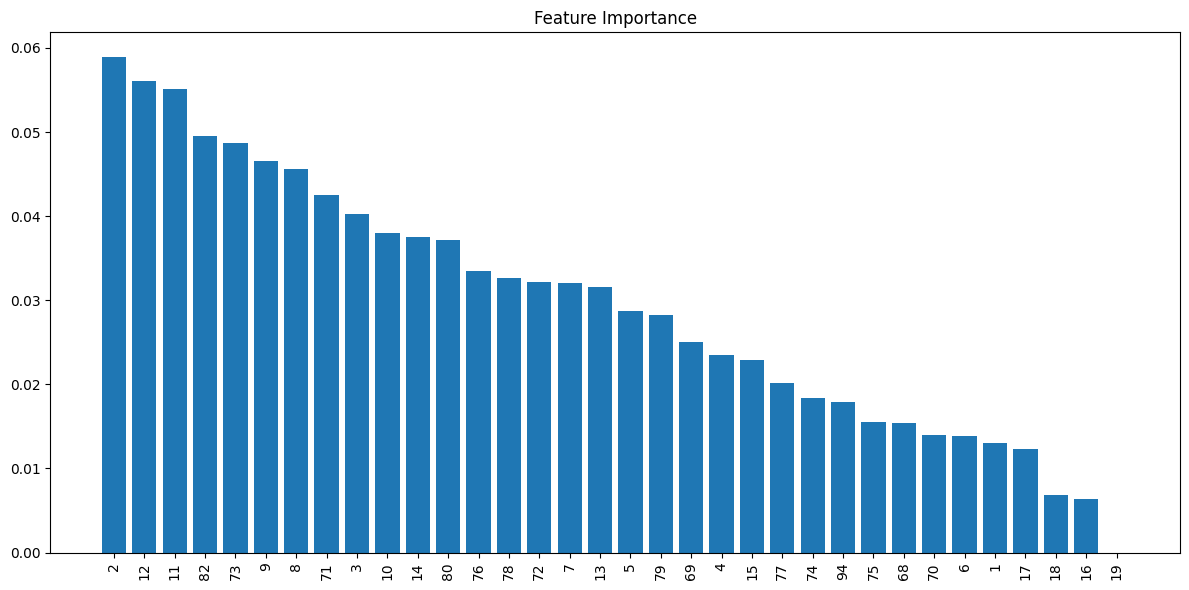

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load your dataset into a pandas DataFrame
data = cleaned_dataset

# Separate the features (X) and target variable (y)
X = data.drop('116', axis=1)
y = data['116']

# Train your random forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()
